              temp
date              
1990-01-01  23.730
1990-01-02  23.505
1990-01-03  22.960
1990-01-04  22.190
1990-01-05  19.820
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32224.570, Time=2.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31895.723, Time=1.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31771.063, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32222.570, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31207.241, Time=6.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31208.135, Time=9.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31208.186, Time=9.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31459.621, Time=3.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31687.555, Time=2.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=31205.242, Time=1.51 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=31769.063, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[0]  

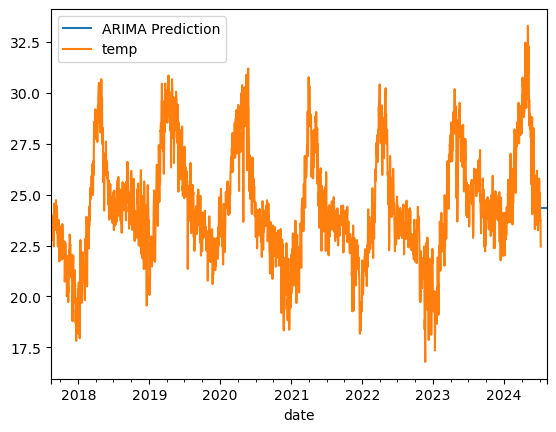

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")


class TimeSeriesAnalysis:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path, index_col='date', parse_dates=True)
        self.df.dropna(inplace=True)
        print(self.df.head())

    def adfuller_test(self):
        dftest = adfuller(self.df['temp'], autolag='AIC')

        #print('\n 1.ADF:\n', dftest[0])
        #print('\n 2.P-value:\n', dftest[1])
        #print('\n 3.Num of lags\n', dftest[2])
        #print("\n 4.Number of observation used for ADF Regression and Critical Values Calculation:\n",dftest[3])
        #print("\n 5.Critical Values:")
        #for key, val in dftest[4].items():
            #print("\t", key, ":", val)

    def auto_arima_fit(self):
        stepwise_fit = auto_arima(self.df['temp'], trace=True, suppress_warnings=True)
        stepwise_fit.summary()

    def train_test_split(self, split_ratio=0.8):
        train_size = int(len(self.df) * split_ratio)
        self.train = self.df.iloc[:train_size]
        self.test = self.df.iloc[train_size:]

    def arima_model(self, order=(1, 1, 1)):
        self.model = ARIMA(self.train['temp'], order=order)
        self.model = self.model.fit()

    def forecast(self):
        start = len(self.train)
        end = start + len(self.test) - 1  # Forecast for the same length as test set
        self.pred = self.model.predict(start=start, end=end, type='levels')


    def evaluate_rmse(self):
        print("Length of test set:", len(self.test))
        print("Length of forecast:", len(self.pred))
        rmse = sqrt(mean_squared_error(self.test, self.pred))
        print("RMSE:", rmse)


    def predict_future(self, start_date='2024-07-09', n_periods=30):
        index_future_dates = pd.date_range(start=start_date, end=pd.to_datetime(start_date) + pd.DateOffset(days=n_periods - 1))
        self.pred = self.model.predict(start=len(self.df), end=len(self.df) + n_periods - 1, type='levels').rename('ARIMA Prediction')
        self.pred.index = index_future_dates
        print(self.pred)

    def plot_forecast(self):
        self.pred.plot(legend=True)  # Use self.pred.index for x-axis
        self.test['temp'].plot( legend=True)
        

if __name__ == "__main__":
    data_path = "tempdata.csv"  # Replace with your data path
    tsa = TimeSeriesAnalysis(data_path)

    # Call the functions to perform analysis
    tsa.adfuller_test()
    tsa.auto_arima_fit()
    tsa.train_test_split()
    tsa.arima_model()
    tsa.forecast()
    tsa.evaluate_rmse()
    tsa.predict_future()
    tsa.plot_forecast()

    # Access results (optional)
    # print(tsa.pred.tail())  # Example: Print the last few predicted values
